# JaSP: un pequeño pathfinder aplicado a laberintos
Inteligencia Artificial
Facultad de Ingeniería Eléctrica

**INTEGRANTES DEL EQUIPO**
- GUSTAVO ALONSO ANAYA MORENO
- AARON URIEL GUZMAN CARDOSO (2100554h@umich.mx)
- PERLA PAOLA PANTALEON BEDOLLA

# Introducción

## El problema
Buscamos encontrar una ruta válida desde $\mathbf{a}$ hasta $\mathbf{b}$, tomando en cuenta solo caminos posibles para el agente de IA. Este tendrá un espacio representado por una matriz binaria $\mathbf{M}$ de $m$ por $n$, tal que el valor de la celda corresponde a la expresión booleana "**No es posible atravesar la celda sin encontrar un obstáculo**".  
### Estado
#### Almacenamiento
Para la resolución de este problema tenemos los siguientes constructos para el almacenamiento del **estado** del problema:
- Posición del agente en la iteración $i$: 
$$
\mathbf{p_i} =
\begin{bmatrix}
x_i \\
y_i \\
\end{bmatrix}
$$ Siendo que esta posición se refiere a la posición de una celda en una matriz.
- El vector de posición inicial $\mathbf{a}$.
- El vector de posición meta $\mathbf{b}$ del agente.

#### Manipulación
Como deseamos manipular $p$ durante iteraciones progresivas hemos definido al operador sucesor como:
$S = \text{Succ}(\mathbf{p}_i) \subseteq D$, tal que todo elemento de $S$ cumpla con "**Ser una celda dentro de los confines de la matriz y esta sea una sin obstáculos**". Aquí $D$ es el conjunto de traslaciones válidas para el vector $\mathbf{p}$, tal que $D = \{\mathbf{d}_{\text{up}}, \mathbf{d}_{\text{down}}, \mathbf{d}_{\text{left}}, \mathbf{d}_{\text{right}} \}$

#### Condición de meta
La condición de meta será simplemente que $\mathbf{p}_i = \mathbf{b}$

#### Heurística
La heurística considerada para el método **A\*** será la distancia Manhattan, ya que esta representa adecuadamente los movimientos posibles para el agente (arriba, abajo, izquierda y derecha pero no diagonales). 
$$ h(x_i,y_i) = | b_1 - x_i| + |b_2 - y_i|$$
Siendo que:
- $b_1$ y $b_2$ son las posiciones meta.
- $x_i$ y $y_i$ son las posiciones de la iteración $i$.

##### Admisibilidad de la Herurística
Nunca sobreestima el costo real de llegar a la meta. En un laberinto de cuadrícula, el camino más corto siempre será igual o mayor que la suma de las distancias horizontales y verticales.


## Propuesta de solución
Dado el problema se realizará su planteamiento y solución en Python con ayuda de la biblioteca incluida en el repositorio `SimpleSearch` para realizar tanto búsqueda no informada (BFS, DFS) como informada (A\*) para la resolución de primeramente laberintos y luego entornos con obstáculos arbitrarios y más de un camino posible.

## Desarrollo

### Creación del entorno y metas

In [1]:

from src.SimpleSearch import node, BlindSearch
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

In [2]:
maze = [
    [0,0,1,0,0,0,1,0,0,0],
    [1,0,1,0,1,0,1,0,1,0],
    [0,0,0,0,1,0,0,0,1,0],
    [0,1,1,1,1,1,1,0,1,0],
    [0,0,0,0,0,0,1,0,1,0],
    [1,1,1,1,1,0,1,0,1,0],
    [0,0,0,0,1,0,0,0,1,0],
    [0,1,1,0,1,0,1,1,1,0],
    [0,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,1,1,1,0]
]

start_state = (0,0)   
goal_state  = (9,9)   


### Funciones que alteran el estado del problema

In [3]:
MOVES = {
    "up": (-1,0),
    "down": (1,0),
    "left": (0,-1),
    "right": (0,1)
}

def successor(n):
    x, y = n.state
    valid = lambda nx, ny: 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] == 0
    successors = [
        node(state=(x+dx, y+dy), parent=n, depth=n.depth+1, op=action)
        for action, (dx, dy) in MOVES.items()
        if valid(x+dx, y+dy)
    ]
    return successors

def goal(n, goal_state):
    return n.state == goal_state

def heuristic(n, goal_state):
    (x1,y1) = n.state
    (x2,y2) = goal_state
    return abs(x1-x2) + abs(y1-y2)


### Búsquedas

Definimos el camino de inicio para todas las búsquedas a través de un nodo de `SimpleSearch`.

In [ ]:

start_node = node(state=start_state)

#### Breadth First Search

In [5]:
search_bfs = BlindSearch(start=start_node, successor=successor, goal=goal, strategy="bfs", goal_state=goal_state)
result_bfs = search_bfs.find()
print("Camino BFS:", result_bfs.getPath())

finished in 51 iterations
Camino BFS: [((0, 0), '', 0), ((0, 1), 'right', 1), ((1, 1), 'down', 2), ((2, 1), 'down', 3), ((2, 0), 'left', 4), ((3, 0), 'down', 5), ((4, 0), 'down', 6), ((4, 1), 'right', 7), ((4, 2), 'right', 8), ((4, 3), 'right', 9), ((4, 4), 'right', 10), ((4, 5), 'right', 11), ((5, 5), 'down', 12), ((6, 5), 'down', 13), ((7, 5), 'down', 14), ((8, 5), 'down', 15), ((8, 6), 'right', 16), ((8, 7), 'right', 17), ((8, 8), 'right', 18), ((8, 9), 'right', 19), ((9, 9), 'down', 20)]


Dado que es una búsqueda por anchura y este laberinto de prueba en especial tiene más de un camino solución, encontramos un camino óptimo. Más adelante veremos que esta búsqueda realizó más iteraciones.

#### Depth First Search

In [6]:
search_dfs = BlindSearch(start=start_node, successor=successor, goal=goal, strategy="dfs", goal_state=goal_state)
result_dfs = search_dfs.find()
print("Camino DFS:", result_dfs.getPath())

finished in 27 iterations
Camino DFS: [((0, 0), '', 0), ((0, 1), 'right', 1), ((1, 1), 'down', 2), ((2, 1), 'down', 3), ((2, 2), 'right', 4), ((2, 3), 'right', 5), ((1, 3), 'up', 6), ((0, 3), 'up', 7), ((0, 4), 'right', 8), ((0, 5), 'right', 9), ((1, 5), 'down', 10), ((2, 5), 'down', 11), ((2, 6), 'right', 12), ((2, 7), 'right', 13), ((3, 7), 'down', 14), ((4, 7), 'down', 15), ((5, 7), 'down', 16), ((6, 7), 'down', 17), ((6, 6), 'left', 18), ((6, 5), 'left', 19), ((7, 5), 'down', 20), ((8, 5), 'down', 21), ((8, 6), 'right', 22), ((8, 7), 'right', 23), ((8, 8), 'right', 24), ((8, 9), 'right', 25), ((9, 9), 'down', 26)]


Con una búsqueda por profundidad encontramos una solución no óptima, esto es lo que sucede al haber más de una sola solución.

#### Búsqueda A\*

In [7]:
search_astar = BlindSearch(start=start_node, successor=successor, goal=goal,
                           strategy="a*", goal_state=goal_state, heuristic=heuristic)
result_astar = search_astar.find()
print("Camino A*:", result_astar.getPath())

finished in 26 iterations
Camino A*: [((0, 0), '', 0), ((0, 1), 'right', 1), ((1, 1), 'down', 2), ((2, 1), 'down', 3), ((2, 0), 'left', 4), ((3, 0), 'down', 5), ((4, 0), 'down', 6), ((4, 1), 'right', 7), ((4, 2), 'right', 8), ((4, 3), 'right', 9), ((4, 4), 'right', 10), ((4, 5), 'right', 11), ((5, 5), 'down', 12), ((6, 5), 'down', 13), ((7, 5), 'down', 14), ((8, 5), 'down', 15), ((8, 6), 'right', 16), ((8, 7), 'right', 17), ((8, 8), 'right', 18), ((8, 9), 'right', 19), ((9, 9), 'down', 20)]


## Síntesis de los resultados

### Caminos obtenidos

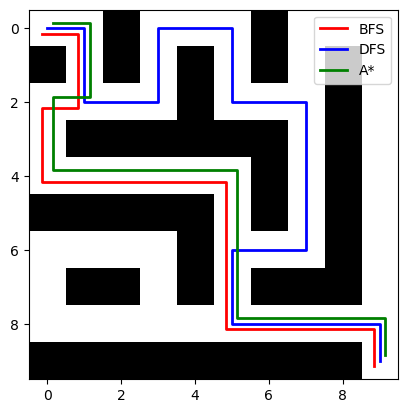

In [8]:
def show_multiple_paths(maze, paths_dict):
    """
    paths_dict: diccionario con { "BFS": path_bfs, "DFS": path_dfs, "A*": path_astar }
    """
    grid = np.array(maze)
    plt.imshow(grid, cmap="binary")

    colors = {"BFS": "red", "DFS": "blue", "A*": "green"}
    offsets = {"BFS": (-0.15, 0.15), "DFS": (0, 0), "A*": (0.15, -0.15)}

    for name, path in paths_dict.items():
        offset = offsets[name]
        if path:
            xs = [p[0][1] + offset[0] for p in path]
            ys = [p[0][0] + offset[1] for p in path]
            plt.plot(xs, ys, color=colors[name], linewidth=2, label=name)

    plt.legend()
    plt.show()


# PARA MOSTRAR LOS TRES CAMINOS
paths_dict = {
    "BFS": result_bfs.getPath(),
    "DFS": result_dfs.getPath(),
    "A*": result_astar.getPath()
}

show_multiple_paths(maze, paths_dict)


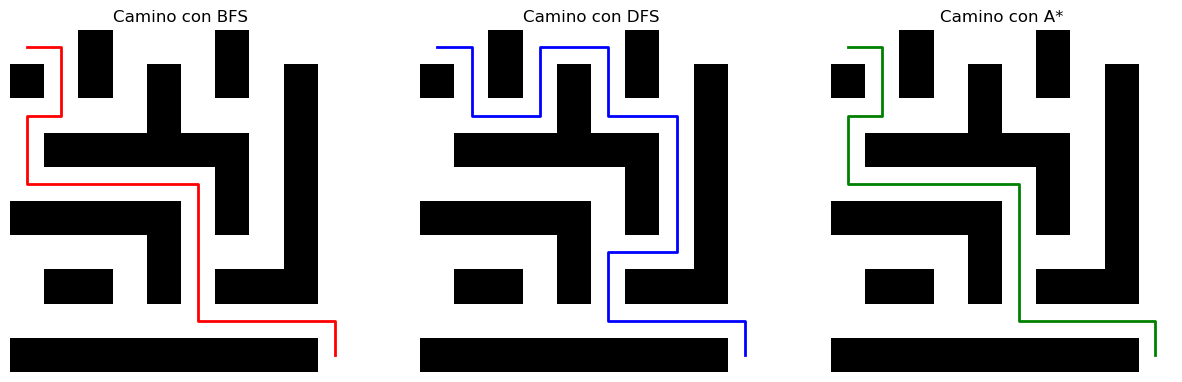

In [9]:
def show_paths_separately(maze, paths_dict):
    grid = np.array(maze)
    fig, axes = plt.subplots(1, len(paths_dict), figsize=(15,5))

    colors = {"BFS": "red", "DFS": "blue", "A*": "green"}
    
    for ax, (name, path) in zip(axes, paths_dict.items()):
        ax.imshow(grid, cmap="binary")
        if path:
            xs = [p[0][1] for p in path]
            ys = [p[0][0] for p in path]
            ax.plot(xs, ys, color=colors[name], linewidth=2)
        ax.set_title(f"Camino con {name}")
        ax.axis("off")
    
    plt.show()



paths_dict = {
    "BFS": result_bfs.getPath(),
    "DFS": result_dfs.getPath(),
    "A*": result_astar.getPath()
}

show_paths_separately(maze, paths_dict)


### Rendimiento de los caminos

In [10]:


def run_search(strategy, heuristic=None):
    start_node = node(state=start_state)
    search = BlindSearch(start=start_node, successor=successor, goal=goal,
                         strategy=strategy, goal_state=goal_state, heuristic=heuristic)
    t0 = time.time()
    result = search.find()
    t1 = time.time()
    elapsed = t1 - t0
    path = result.getPath()
    return {
        "Estrategia": strategy,
        "Tiempo (s)": round(elapsed, 6),
        "Nodos expandidos": len(search.visited),
        "Longitud del camino": len(path)
    }

results = []
results.append(run_search("bfs"))
results.append(run_search("dfs"))
results.append(run_search("a*", heuristic=heuristic))

df_results = pd.DataFrame(results)
df_results


finished in 51 iterations
finished in 27 iterations
finished in 26 iterations


,Estrategia,Tiempo (s),Nodos expandidos,Longitud del camino
0,bfs,0.001575,55,21
1,dfs,0.000179,32,27
2,a*,0.000195,30,21


# Conclusiones
- Debido a que la distnacia Manhattan captura mejor los movimientos del agente en el mapa, esta es una mejor representación que la distancia diagonal, que usa un movimiento un poco " más imposible" de moverse en diagonal en un solo movimiento.
- Además, la distancia Manhattan es mejor heurística porque da siempre valores mayores y más cercanos a los reales que les tomaría al agente para llegar al destino.
- Adicionalmente, dado que los laberintos de prueba son circuitos en donde existe únicamente un solo camino entre un nodo y otro, es posible usar algoritmos para Árboles Recubridores Mínimo para diseñar los caminos de prueba.